# Fake News Detection 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
%matplotlib inline

In [2]:
df_fake = pd.read_csv('Fake.csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
df_true = pd.read_csv('True.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Data Preprocessing

In [4]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


<AxesSubplot:>

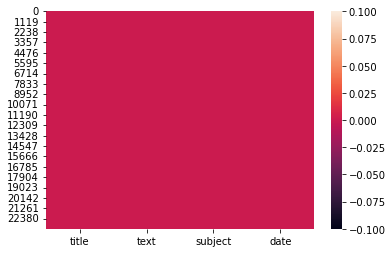

In [5]:
sns.heatmap(df_fake.isnull())

In [6]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [7]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


<AxesSubplot:>

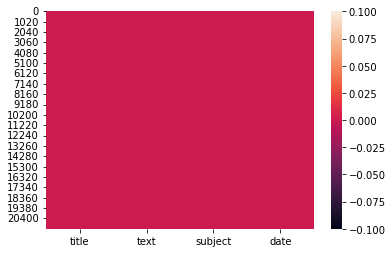

In [8]:
sns.heatmap(df_true.isnull())

In [9]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [10]:
df_fake['Result'] = 0
df_true['Result'] = 1

In [11]:
df_fake.head()

,title,text,subject,date,Result
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [12]:
df_true.head()

,title,text,subject,date,Result
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
df = pd.concat([df_fake,df_true])

In [14]:
df.head()

,title,text,subject,date,Result
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [15]:
print(df_fake.shape)
print(df_true.shape)
print(df.shape)

(23481, 5)
(21417, 5)
(44898, 5)


In [16]:
df.columns

Index(['title', 'text', 'subject', 'date', 'Result'], dtype='object')

In [17]:
df = df.drop(['title','subject','date'],axis=1)
df.head()

,text,Result
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [18]:
df = df.sample(frac=1)
df.head()

,text,Result
18001,The information below is almost like a satire ...,0
8155,WASHINGTON (Reuters) - President Barack Obama ...,1
16664,BAGHDAD (Reuters) - U.S. Secretary of State Re...,1
823,WASHINGTON (Reuters) - The head of the Democra...,1
20371,HAVANA (Reuters) - President Raul Castro calle...,1


In [19]:
df.reset_index(inplace=True)

In [20]:
df.head()

,index,text,Result
0,18001,The information below is almost like a satire ...,0
1,8155,WASHINGTON (Reuters) - President Barack Obama ...,1
2,16664,BAGHDAD (Reuters) - U.S. Secretary of State Re...,1
3,823,WASHINGTON (Reuters) - The head of the Democra...,1
4,20371,HAVANA (Reuters) - President Raul Castro calle...,1


In [21]:
df.drop(['index'],axis=1,inplace=True)

In [22]:
df.head()

,text,Result
0,The information below is almost like a satire ...,0
1,WASHINGTON (Reuters) - President Barack Obama ...,1
2,BAGHDAD (Reuters) - U.S. Secretary of State Re...,1
3,WASHINGTON (Reuters) - The head of the Democra...,1
4,HAVANA (Reuters) - President Raul Castro calle...,1


### Task of NLP Comes Here

#### Step - 1 : Convert the text in lowercase and remove the extra space, special chr., ulr and links.

In [23]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [24]:
df['text'] = df['text'].apply(wordopt)

In [25]:
df.head()

,text,Result
0,the information below is almost like a satire ...,0
1,washington reuters president barack obama ...,1
2,baghdad reuters u s secretary of state re...,1
3,washington reuters the head of the democra...,1
4,havana reuters president raul castro calle...,1


#### Step - 2: Tokenization
#### Step - 3: Removal of Stop Words
#### Step - 4: Stemming and Lemmatization

In [28]:
def nlpSteps(text):
    tokens = nltk.word_tokenize(text)
    stop_words = stopwords.words('english')
    txt_no_stopwords = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for w in txt_no_stopwords:
        lemmatized_words.append(lemmatizer.lemmatize(w))
    text = " ".join(lemmatized_words)
    return text

In [29]:
df['text'] = df['text'].apply(nlpSteps)

In [30]:
df.head()

,text,Result
0,information almost like satire piece onion fun...,0
1,washington reuters president barack obama said...,1
2,baghdad reuters u secretary state rex tillerso...,1
3,washington reuters head democratic national co...,1
4,havana reuters president raul castro called cu...,1


#### Creation of TDIF Vectors

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectors = TfidfVectorizer()
x = vectors.fit_transform(df['text'])

### Fitting it into ML Model (Neural Networks) and Calculating its Accuracy

In [52]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score 
#from sklearn.model_selection import cross_val_score
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=20)
y = df['Result']
#for folds in range(2,16):
#    scores = cross_val_score(sgd,x,df['Result'],cv=folds)
#    print(f'Cross validation score for {folds} folds: {scores.mean():.4f}')
kf = KFold(n_splits=10)
scores = []
for train, test in kf.split(x,y):
    x_train = x[train] 
    x_test = x[test]
    y_train = y[train]
    y_test = y[test]
    sgd.fit(x_train,y_train)
    y_pred = sgd.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
scores = np.array(scores)
print('Accuracy of the model: ',np.mean(scores))

Accuracy of the model:  0.9900664480013258


### Its Time For Manual Testing!!!

In [59]:
def output_labels(n):
    if(n==0):
        return 'Fake News'
    else:
        return 'Not A Fake News'
def manual_testing(news):
    testing_news = {'text':[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(wordopt)
    new_def_test['text'] = new_def_test['text'].apply(nlpSteps)
    new_xv_test = vectors.transform(new_def_test['text'])
    prediction = sgd.predict(new_xv_test)
    return print('Prediction:',output_labels(prediction))

In [61]:
news = str(input())
manual_testing(news)

MINSK (Reuters) - In the shadow of disused Soviet-era factories in Minsk, a street lined with eclectic bars, art galleries and yoga studios has become a haven from the vigilant eyes of the Belarussian authorities.  This place is like an island,  said Yegor, 21, who works at  popular bar Hooligan.  It s the street of freedom.  The government of President Alexander Lukashenko, who has ruled Belarus for the past 23 years and has boasted that he is  the last and only dictator in Europe  ,has little tolerance for any opposition. A powerful police force and feared state security  keep citizens in check. But police patrols are rare in Oktyabrskaya, partly due to its location on an out-of-the-way peninsula in a bend of the river Svislach. When the first restaurant opened there in 2012, few visitors came but now it ranks among the most fashionable quarters of Minsk.  Such is the growing popularity of that Oktyabrskaya that investors such as Belgazprombank, a subsidiary of state-owned Russian le